In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
values = pd.read_csv('result.csv')

In [3]:
values.head()

,Website,Delay,Time for transfer,tcp
0,flipkart,20,0.20,vanilla
1,flipkart,100,1.00,vanilla
2,flipkart,200,2.00,vanilla
3,amazon_in,20,13.88,vanilla
4,amazon_in,100,28.28,vanilla


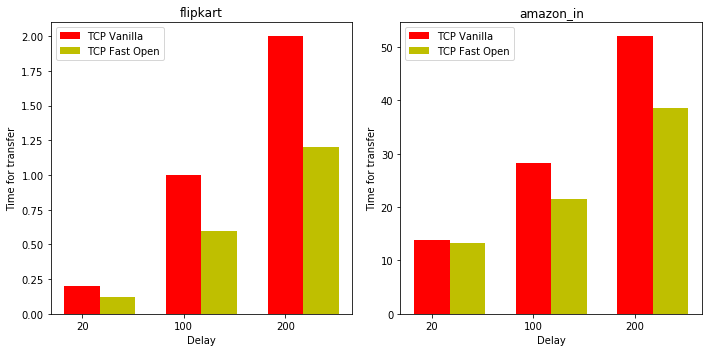

In [4]:
websites = values.Website.unique()
delays = np.array(values.Delay.unique())
delays.sort()
fig, ax = plt.subplots(ncols = websites.shape[0], figsize=(10, 5))
pos = 0
width = 0.35
#fig.subplots_adjust(hspace=0.5)
for website in websites:
    #ax = fig.add_subplot(1,pos)
    ip = values[values.Website == website]
    ip1 = ip[ip.tcp =='vanilla']
    ip2 = ip[ip.tcp =='fast_open']
    y_pos = np.arange(ip1.shape[0])
    
    rects1 = ax[pos].bar(y_pos, ip1['Time for transfer'],width, color='r')

    rects2 = ax[pos].bar(y_pos + width, ip2['Time for transfer'],width, color='y')
    
    ax[pos].set_ylabel("Time for transfer")
    ax[pos].set_xlabel("Delay")
    ax[pos].set_title(website)
    ax[pos].set_xticks(y_pos)
    ax[pos].set_xticklabels(delays)
    ax[pos].legend((rects1[0], rects2[0]), ('TCP Vanilla', 'TCP Fast Open'))
    pos = pos + 1
plt.tight_layout()
plt.show()